In [7]:
#pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [33]:
# Step 1: Specify the problem and define linguistic variables
def define_variables():

    print("Defining linguistic variables and their fuzzy sets...")

    intact_col = ctrl.Antecedent(np.arange(0, 200,1), 'intact_col')
    intact_col['none']=fuzz.trapmf(intact_col.universe,[0,0,1,2])
    intact_col['low']=fuzz.trapmf(intact_col.universe, [0, 3, 6,8])
    intact_col['medium']=fuzz.trapmf(intact_col.universe, [7,12, 15, 17])
    intact_col['high']=fuzz.smf(intact_col.universe, 16, 20)

    tilt=ctrl.Antecedent(np.arange(0, 91,1),'tilt')
    tilt['exist']=fuzz.trapmf(tilt.universe,[1,1,90,90])

    ruble_percentage=ctrl.Antecedent(np.arange(1, 101,1),'ruble_percentage')
    ruble_percentage['none']= fuzz.trapmf(ruble_percentage.universe,[0,0,1,2])
    ruble_percentage['light']= fuzz.trapmf(ruble_percentage.universe, [1, 3, 9,10])
    ruble_percentage['moderate'] = fuzz.gauss2mf(ruble_percentage.universe,10,3,20,10)
    ruble_percentage['heavy'] = fuzz.gauss2mf(ruble_percentage.universe,30,10,50,10)
    ruble_percentage['massive']  = fuzz.smf(ruble_percentage.universe, 50, 70)

    building_area = ctrl.Antecedent(np.arange(0, 3000, 1), 'building_area')
    building_area['small']=fuzz.trapmf(building_area.universe, [0, 0, 250,500])
    building_area['medium']=fuzz.trapmf(building_area.universe, [0,500, 800, 1050])
    building_area['large']= fuzz.smf(building_area.universe,750, 1200)

    building_hight=ctrl.Antecedent(np.arange(1, 21,1),'building_hight')
    building_hight['short'] = fuzz.trapmf(building_hight.universe, [0, 1, 2,3])
    building_hight['average'] = fuzz.gauss2mf(building_hight.universe,3,2,5,2)
    building_hight['tall'] = fuzz.smf(building_hight.universe, 6, 8)
    
    building_age = ctrl.Antecedent(np.arange(0, 120, 1),'building_age')
    building_age['new'] = fuzz.trapmf(building_age.universe, [0, 0,5, 15])
    building_age['middile'] = fuzz.trapmf(building_age.universe, [10, 20, 30, 35])
    building_age["old"] = fuzz.trapmf(building_age.universe, [30, 40, 50, 55])
    building_age['very old'] = fuzz.trapmf(building_age.universe, [50, 70, 120, 120])
    
    damage_per = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'damage')
    damage_per['none']= fuzz.trapmf(damage_per.universe,[0,0,.05,.18])
    damage_per['light']= fuzz.trimf(damage_per.universe, [.05, .18, .31])
    damage_per['moderate'] = fuzz.trimf(damage_per.universe,[.18, .31, .55])
    damage_per['heavy'] = fuzz.trimf(damage_per.universe,[.31, .55, .88])
    damage_per['severe']  = fuzz.trapmf(damage_per.universe, [.55, .75,1,1])

    damage = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'damage_out')
    damage['none']= fuzz.trapmf(damage.universe,[0,0,.05,.18])
    damage['light']= fuzz.trimf(damage.universe, [.05, .18, .31])
    damage['moderate'] = fuzz.trimf(damage.universe,[.18, .31, .55])
    damage['heavy'] = fuzz.trimf(damage.universe,[.31, .55, .88])
    damage['severe']  = fuzz.trapmf(damage.universe, [.55, .75,1,1])
    
    habitability = ctrl.Consequent(np.arange(0, 1.05, 0.05), 'habitability')
    habitability['dangrouse']= fuzz.trapmf(habitability.universe,[0,0,.25,.45])
    habitability['prohibited']= fuzz.trimf(habitability.universe, [.25, .50, .75])
    habitability['restricted'] = fuzz.trimf(habitability.universe,[.50, .75, 1])
    habitability['usable']  = fuzz.trapmf(habitability.universe, [.75, .85,1,1])

    reparability = ctrl.Consequent(np.arange(0, 1.05, 0.05), 'reparability')
    reparability['Possible demolition']= fuzz.trapmf(reparability.universe,[0,0,.25,.45])
    reparability['Strengthening']= fuzz.trimf(reparability.universe, [.25, .50, .75])
    reparability['Reparation'] = fuzz.trimf(reparability.universe,[.50, .75, 1])
    reparability['Not any or minor']  = fuzz.trapmf(reparability.universe, [.75, .85,1,1])

    print("Linguistic variables and fuzzy sets defined successfully.")
    return (intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,
            building_age,damage,habitability,reparability)

intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,building_age,damage,habitability,reparability=define_variables()
vars=(intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,building_age,damage,habitability,reparability)


Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.


In [34]:
# Step 2 & 3: Construct fuzzy rules
def construct_rules():
    print("Constructing fuzzy rules...")
    #-----------------------------------------------------------------------Rule Base1 for getting the damege-----------------------
    rule1 = ctrl.Rule(intact_col['none'], damage_per['severe'])

    rule2 = ctrl.Rule(intact_col['low'] & building_area['small'], damage_per['moderate'])
    rule3 = ctrl.Rule(intact_col['low'] & building_area['medium'], damage_per['heavy'])
    rule4 = ctrl.Rule(intact_col['low'] & building_area['large'], damage_per['severe'])
    rule5 = ctrl.Rule(intact_col['medium'] & building_area['small'], damage_per['light'])
    rule6 = ctrl.Rule(intact_col['medium'] & building_area['medium'], damage_per['moderate'])
    rule7 = ctrl.Rule(intact_col['medium'] & building_area['large'], damage_per['heavy'])
    rule8 = ctrl.Rule(intact_col['high'] & building_area['small'], damage_per['light'])
    rule9 = ctrl.Rule(intact_col['high'] & building_area['medium'], damage_per['light'])
    rule10 = ctrl.Rule(intact_col['high'] & building_area['large'], damage_per['moderate'])

    rule11 = ctrl.Rule(tilt['exist'], damage_per['severe'])    
    rule12 = ctrl.Rule(ruble_percentage['massive'], damage_per['severe'])
    rule13 = ctrl.Rule(ruble_percentage['none'], damage_per['none'])

    rule14 = ctrl.Rule(ruble_percentage['light'] & building_area['small'], damage_per['moderate'])
    rule15 = ctrl.Rule(ruble_percentage['light'] & building_area['medium'] , damage_per['light'])
    rule16 = ctrl.Rule(ruble_percentage['light'] & building_area['large'] , damage_per['light'])
    rule17 = ctrl.Rule(ruble_percentage['moderate'] & building_area['small'] , damage_per['heavy'])
    rule18 = ctrl.Rule(ruble_percentage['moderate'] & building_area['medium'], damage_per['moderate'])
    rule19 = ctrl.Rule(ruble_percentage['moderate'] & building_area['large'] , damage_per['light'])
    rule20 = ctrl.Rule(ruble_percentage['heavy']  & building_area['small'] , damage_per['severe'])
    rule21 = ctrl.Rule(ruble_percentage['heavy']  & building_area['medium'] , damage_per['heavy'])
    rule22 = ctrl.Rule(ruble_percentage['heavy']  & building_area['large'] , damage_per['moderate'])

    rule23 = ctrl.Rule(ruble_percentage['light']  & building_hight['short'] , damage_per['light'])
    rule24 = ctrl.Rule(ruble_percentage['light']  & building_hight['average'] , damage_per['moderate'])
    rule25 = ctrl.Rule(ruble_percentage['light']  & building_hight['tall'] , damage_per['moderate'])
    rule26 = ctrl.Rule(ruble_percentage['moderate']  & building_hight['short'] , damage_per['moderate'])
    rule27 = ctrl.Rule(ruble_percentage['moderate']  & building_hight['average'] , damage_per['moderate'])
    rule28 = ctrl.Rule(ruble_percentage['moderate']  & building_hight['tall'] , damage_per['heavy'])
    rule29 = ctrl.Rule(ruble_percentage['heavy']  & building_hight['short'] , damage_per['heavy'])
    rule30 = ctrl.Rule(ruble_percentage['heavy']  & building_hight['average'] , damage_per['heavy'])
    rule31 = ctrl.Rule(ruble_percentage['heavy']  & building_hight['tall'] , damage_per['severe'])

    #-----------------------------------------------------------------------Rule Base2 for getting the recommendations-----------------------
    #---------------------------------------Habitability
    rule32 = ctrl.Rule(damage['none'], habitability['usable'])
    rule33 = ctrl.Rule(damage['severe'], habitability['dangrouse'])
    rule34 = ctrl.Rule(damage['light'] & building_age['very old'], habitability['restricted'])
    rule35 = ctrl.Rule(damage['light'] & ~(building_age['very old']), habitability['usable'])
    rule36 = ctrl.Rule(damage['moderate'] & building_age['very old'], habitability['prohibited'])
    rule37 = ctrl.Rule(damage['moderate'] & ~(building_age['very old']), habitability['restricted'])
    rule38 = ctrl.Rule(damage['heavy'] & building_age['very old'], habitability['dangrouse'])
    rule39 = ctrl.Rule(damage['heavy'] & ~(building_age['very old']), habitability['prohibited'])
    #---------------------------------------Reparability
    rule40 = ctrl.Rule(damage['none'], reparability['Possible demolition'])
    rule41 = ctrl.Rule((damage['none']|damage['light'] | damage['moderate']) & building_age['very old'], reparability['Strengthening'])
    rule42 = ctrl.Rule(damage['heavy'] & building_age['very old'], reparability['Possible demolition'])
    rule43 = ctrl.Rule(damage['heavy'] & ~(building_age['very old']), reparability['Strengthening'])

    rule44 = ctrl.Rule((building_age['middile'] | building_age['new']) & (damage['none']|damage['light'] ), reparability['Not any or minor'])
    rule45 = ctrl.Rule(damage['moderate'] & ~(building_age['very old']), reparability['Reparation'])
    rule46 = ctrl.Rule((damage['none']|damage['light']) & building_age["old"], reparability['Reparation'])

    print("Complete fuzzy rule base constructed successfully.")
    return [
        rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
        rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
        rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25,
        rule26, rule27,rule28,rule29,rule30,rule31,
        
        rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,
        rule40,rule41,rule42,rule43,rule44,rule45,rule46]

In [35]:
# Step 4: Encode fuzzy sets and rules into the expert system
def create_fuzzy_system(rules):
    print("Creating the fuzzy expert system...")
    Fuzzy_sys = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))
    print("Fuzzy expert system created successfully.")
    return Fuzzy_sys

In [36]:
print("Building a Fuzzy Expert System for damage Assessment...")

intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,building_age,damage,habitability,reparability=define_variables()

rules = construct_rules()
damage_sim = create_fuzzy_system(rules[:31])
results_sim = create_fuzzy_system(rules[32:])

print("Fuzzy Expert System completed executing.")

Building a Fuzzy Expert System for damage Assessment...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Complete fuzzy rule base constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
Fuzzy Expert System completed executing.


0.22787793262475164


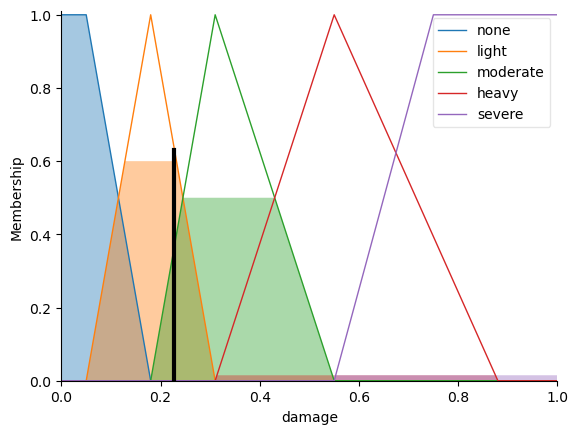

In [37]:
# damage_sim
#Inputs: building_hight ruble_percentage building_area intact_col
damage_sim.input['building_hight'] = 3
damage_sim.input['ruble_percentage']=.2
damage_sim.input['building_area'] = 250
damage_sim.input['intact_col'] = 10
damage_sim.input['tilt'] = 0
damage_sim.compute()
print(damage_sim.output.get('damage'))
damage_per.view(sim=damage_sim)

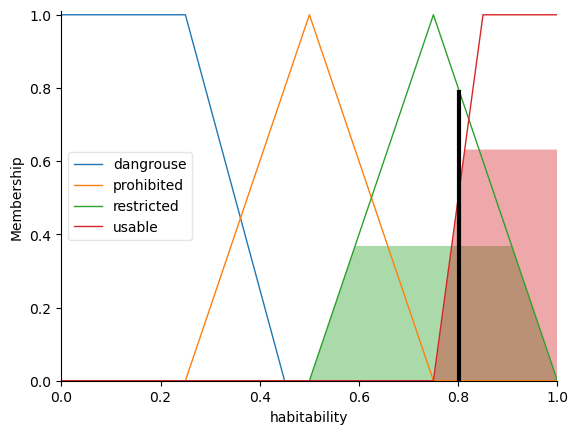

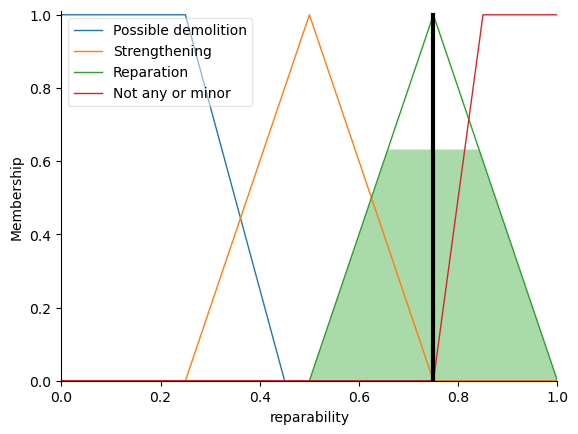

In [39]:
# results_sim
# inputs: damage_out building_age
# output: reparability habitability
results_sim.input['damage_out']=damage_sim.output.get('damage')
results_sim.input['building_age']=40
results_sim.compute()
results_sim.output
habitability.view(sim=results_sim)
reparability.view(sim=results_sim)

# the end of the project